In [49]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

<BarContainer object of 10 artists>

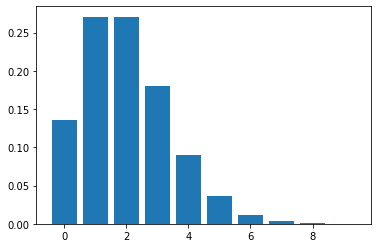

In [3]:
x = np.arange(0, 10)
y = stats.poisson(2).pmf(x)

plt.bar(x, y)

- What is the probability that no cars drive up in the noon hour?

In [4]:
stats.poisson(2).pmf(0)

0.1353352832366127

In [98]:
(stats.poisson(2).rvs(10_000) == 0).mean()

0.1369

- What is the probability that 3 or more cars come through the drive through?

In [5]:
stats.poisson(2).sf(2)

0.32332358381693654

In [99]:
(stats.poisson(2).rvs(10_000) >= 3).mean()

0.3255

- How likely is it that the drive through gets at least 1 car?

In [6]:
stats.poisson(2).sf(0)

0.8646647167633873

In [100]:
(stats.poisson(2).rvs(10_000) >= 1).mean()

0.8666

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?

(array([  18.,  141.,  562., 1577., 2566., 2646., 1725.,  612.,  134.,
          19.]),
 array([1.91757076, 2.13222469, 2.34687861, 2.56153254, 2.77618647,
        2.9908404 , 3.20549432, 3.42014825, 3.63480218, 3.84945611,
        4.06411003]),
 <a list of 10 Patch objects>)

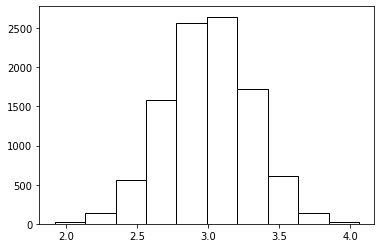

In [9]:
plt.hist(stats.norm(3, .3).rvs(10_000), bins=10, fc='white', ec='black')

In [12]:
stats.norm(3, .3).isf(.05)

3.4934560880854417

In [101]:
(np.percentile(stats.norm(3, .3).rvs(10_000), 95))

3.4841704000130393

- What GPA constitutes the bottom 15% of the class?

In [13]:
stats.norm(3, .3).ppf(.15)

2.689069983151863

In [102]:
(np.percentile(stats.norm(3, .3).rvs(10_000), 15))

2.6828737530179834

- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [103]:
# Bottom edge of 3rd decile
stats.norm(3, .3).ppf(.2)

2.7475136299281258

In [104]:
# Upper edge of 3rd decile
stats.norm(3, .3).isf(.3)

3.157320153812412

In [ ]:
# Yes, a student with 2.8 GPA would qualify

- If I have a GPA of 3.5, what percentile am I in?

In [20]:
stats.norm(3, .3).sf(3.5)

0.0477903522728147

In [ ]:
# we are in the top 95% percentile

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [22]:
# what is the click through rate of 4326 visitors & 97 click-throughs?
97 / 4326

0.022422561257512713

<BarContainer object of 80 artists>

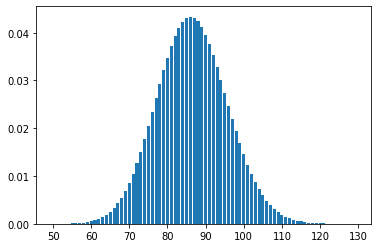

In [97]:
x = np.arange(50, 130)
y = stats.binom(4326, .02).pmf(x)

plt.bar(x, y)

In [65]:
# the avg rate is .02
stats.binom(4326, .02).sf(96)

0.1397582363130086

In [105]:
(stats.binom(4326, .02).rvs(10_000) > 96).mean()

0.1413

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?

<BarContainer object of 100 artists>

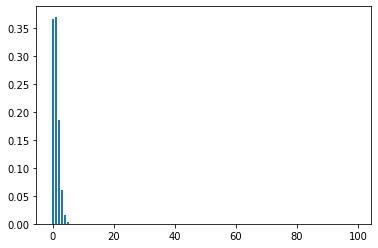

In [45]:
x = np.arange(0, 100)
y = stats.binom(100, .01).pmf(x)

plt.bar(x, y)

In [47]:
# What is the probability that at least one of your first 60 answers is correct?
stats.binom(60, .01).sf(0)

0.4528433576092388

In [106]:
(stats.binom(60, .01).rvs(10_000) > 0).mean()

0.4552

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? 

In [39]:
# on any given day, about 90% of the 3 active cohorts of 22 students 
# visit the break area - I'm interpreting this as n

22 * 3 * .9

59.4

<BarContainer object of 66 artists>

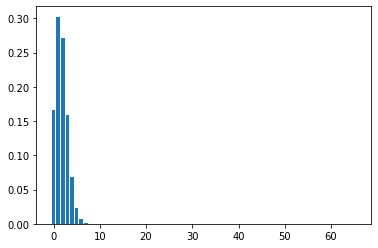

In [41]:
x = np.arange(0, 66)
y = stats.binom(59, .03).pmf(x)

plt.bar(x, y)

In [58]:
# How likely is it that the break area gets cleaned up each day?
stats.binom(59, .03).sf(0)

0.8342199288437355

In [107]:
(stats.binom(59, .03).rvs(10_000) > 0).mean()

0.8333

How likely is it that it goes two days without getting cleaned up? 

In [43]:
stats.binom(59 * 2, .03).pmf(0)

0.02748303199257623

All week?

In [44]:
stats.binom(59 * 5, .03).pmf(0)

0.00012521651388091353

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.



(2 mins * each person in line) + 
((10 minutes to get food) + (15 minutes to eat) = 25)
must be < 60 minutes

60 - 25 = 35 minutes for waiting on people to order

35 - 2 mins for my own order = 33

33 / 2 = max of 16 people in line

(array([  1.,   2.,   1.,   3.,   3.,   6.,  12.,  26.,  32.,  51.,  59.,
         78.,  95.,  92., 109., 102.,  90.,  74.,  65.,  41.,  24.,  15.,
          8.,   5.,   4.,   1.,   0.,   0.,   0.,   1.]),
 array([ 3.69633828,  4.48830548,  5.28027267,  6.07223987,  6.86420707,
         7.65617426,  8.44814146,  9.24010866, 10.03207585, 10.82404305,
        11.61601025, 12.40797744, 13.19994464, 13.99191184, 14.78387904,
        15.57584623, 16.36781343, 17.15978063, 17.95174782, 18.74371502,
        19.53568222, 20.32764941, 21.11961661, 21.91158381, 22.703551  ,
        23.4955182 , 24.2874854 , 25.07945259, 25.87141979, 26.66338699,
        27.45535419]),
 <a list of 30 Patch objects>)

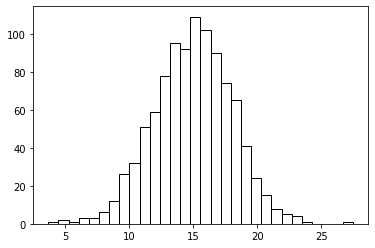

In [37]:
plt.hist(stats.norm(15, 3).rvs(1_000), bins=30, fc='white', ec='black')

In [109]:
stats.norm(15, 3).cdf(16)

0.6305586598182363

In [112]:
# solution from class
stats.norm(15, 3).cdf(16.5)

0.6914624612740131

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. Model the distribution of employees salaries with a normal distribution and answer the following questions:

In [53]:
def get_db_url(db_name):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    return url

url = get_db_url('employees')

salaries = pd.read_sql('SELECT salary FROM salaries WHERE to_date > now()', url)
salaries

,salary
0,88958
1,72527
2,43311
3,74057
4,94692
...,...
240119,52868
240120,69501
240121,83441
240122,55003


In [56]:
# average salary
salary_mu = salaries.mean()
salary_mu

salary    72012.235857
dtype: float64

In [57]:
# std dev of salaries
salary_sigma = salaries.std()
salary_sigma

salary    17309.99538
dtype: float64

(array([  1.,   2.,   9.,  16.,  28.,  52.,  89., 146., 221., 310., 398.,
        512., 662., 785., 842., 882., 935., 884., 798., 626., 479., 442.,
        310., 230., 137.,  91.,  46.,  43.,  20.,   4.]),
 array([  8515.62787321,  12481.7944069 ,  16447.96094059,  20414.12747428,
         24380.29400797,  28346.46054166,  32312.62707535,  36278.79360904,
         40244.96014274,  44211.12667643,  48177.29321012,  52143.45974381,
         56109.6262775 ,  60075.79281119,  64041.95934488,  68008.12587857,
         71974.29241226,  75940.45894596,  79906.62547965,  83872.79201334,
         87838.95854703,  91805.12508072,  95771.29161441,  99737.4581481 ,
        103703.62468179, 107669.79121549, 111635.95774918, 115602.12428287,
        119568.29081656, 123534.45735025, 127500.62388394]),
 <a list of 30 Patch objects>)

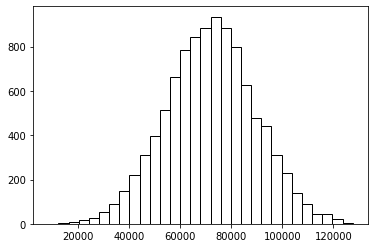

In [66]:
# Model the distribution of employees salaries with a normal distribution
plt.hist(stats.norm(salary_mu, salary_sigma).rvs(10_000), bins=30, fc='white', ec='black')

(array([2.2396e+04, 5.6290e+04, 6.6878e+04, 4.7320e+04, 2.7247e+04,
        1.3343e+04, 5.0560e+03, 1.3390e+03, 2.2800e+02, 2.7000e+01]),
 array([ 38623. ,  50582.7,  62542.4,  74502.1,  86461.8,  98421.5,
        110381.2, 122340.9, 134300.6, 146260.3, 158220. ]),
 <a list of 10 Patch objects>)

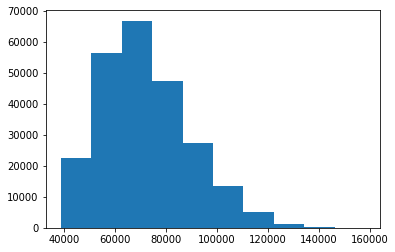

In [117]:
# Actual salaries
x = np.array(salaries)
plt.hist(x)

- What percent of employees earn less than 60,000?

In [71]:
stats.norm(72012.235857, 17309.99538).cdf(59999)

0.24383930997856273

In [113]:
# actual
(salaries < 60_000).mean()

salary    0.270573
dtype: float64

- What percent of employees earn more than 95,000?

In [72]:
stats.norm(72012.235857, 17309.99538).sf(95000)

0.09208819199191742

In [114]:
# actual
(salaries > 95_000).mean()

salary    0.108627
dtype: float64

- What percent of employees earn between 65,000 and 80,000?

In [75]:
stats.norm(72012.235857, 17309.99538).cdf(80000) - stats.norm(72012.235857, 17309.99538).cdf(65000)

0.33506056854908584

In [115]:
# actual
((salaries < 80_000) & (salaries > 65_000)).mean()

salary    0.325107
dtype: float64

- What do the top 5% of employees make?

In [78]:
stats.norm(72012.235857, 17309.99538).isf(.05)

100484.64454030624